<img src='banner.jpg' width='1500' height='500' align='center'>
<center><i>Image Source: PRCboard.com</i></center>

# Philippine Senatorial Elections 2019

The 2019 Philippine National Elections concluded recently. With this, let's take a deeper dive on the results of the election.

### <u>Problem Statement</u>

In the top twelve (12) senators, what region did each candidate dominate in?
Additionally, using the 2015 Philippine Census Data, focus on four (4) candidates and understand what might be the reasons that made them dominate these regions.

#### <i>Rationale</i>

Getting to know the reasons as to why a certain candidate dominated in a particular region provides some representation of the voters' demographic that each candidate appeals to.

For aspiring candidates, it is obvious that this will be useful for them to know which voters to target for when campaigning.

For interested readers, it will give a glimpse of how homecourt advantage, gender, age, and occupation can affect election results.

### <u>The Data</u>

There are two (2) main datasets that are used in this analysis, namely:
> - 2015 Census Datasets
- 2019 Philippine National Election Results


Details on data collection, data structure, file format, and relevant attributes are discussed below.


<i>Datasets were provided by the ACCeSs Lab of the Asian Institute of Management (AIM).</i>

#### <i>2015 Census Datasets</i>

The 2015 Census Datasets were obtained from the Philippine Statistics Authority. It is in the form of a `.xlsx` file. Each census dataset consists of fifteen (15) sheets. The corresponding sheet name and description is shown below.

<table>
    <tr>
        <th>Sheet Name</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>T1</td>
        <td>Population Enumerated in Various Censuses: 1960 - 2015</td>
    </tr>
    <tr>
        <td>T2</td>
        <td>Total Population by Single-Year Age and Sex: 2015</td>
    </tr>
    <tr>
        <td>T3</td>
        <td>Household Population by Single-Year Age and Sex: 2015</td>
    </tr>
    <tr>
        <td>T4</td>
        <td>Total Population by Age Group, and Sex: 2015</td>
    </tr>
    <tr>
        <td>T5</td>
        <td>Household Population by Age Group and Sex: 2015</td>
    </tr>
    <tr>
        <td>T6</td>
        <td>Total Population 10 Years Old and Over by Age Group, Marital Status, and Sex: 2015</td>
    </tr>
    <tr>
        <td>T7</td>
        <td>Household Population 10 Years Old and Over by Age Group, Marital Status and Sex: 2015</td>
    </tr>
    <tr>
        <td>T8</td>
        <td>Total Population by Religious Affiliation and Sex: 2015</td>
    </tr>
    <tr>
        <td>T9</td>
        <td>Household Population 5 to 24 Years Old Who Were Currently Attending School by Age Group and Sex: 2015
        </td>
    </tr>
    <tr>
        <td>T10</td>
        <td>Literacy of the Household Population 10 Years Old and Over by Age Group and Sex: 2015</td>
    </tr>
    <tr>
        <td>T11</td>
        <td>Total Population 5 Years Old and Over by Highest Grade/Year Completed, Sex, and Age: 2015</td>
    </tr>
    <tr>
        <td>T12</td>
        <td>Overseas Workers 15 Years Old and Over by Highest Grade/Year Completed, Sex, and Age Group: 2015</td>
    </tr>
    <tr>
        <td>T13</td>
        <td>Gainful Workers 15 Years Old and Over by Major Occupation Group, Age Group, and Sex: 2015 </td>
    </tr>
    <tr>
        <td>T14</td>
        <td>Household Population by Relationship to the Household Head and Household Size: 2015</td>
    </tr>
    <tr>
        <td>T15</td>
        <td>Number of Households by Age Group, Sex of Household Head, and Household Size: 2015</td>
    </tr>
</table>

Later in this post, we will use only the files and sheets that are relevant to the analysis.

#### <i>2019 Philippine National Election Results Datasets</i>

The 2019 Philippine National Election Results Datasets were obtained from the `2019electionresults.comelec.gov.ph` website using Professor Christian Alis' scrapER 2019 available at https://github.com/ianalis/scraper2019.

The scraper creates two (2) directories:
>- contests
- results

##### contests
- The contests directory contains .json files named by their contest code `cc`.
- Each json file contains the keys `cc`, `cn`, `ccc`, `ccn`, `pre`, `type`, `bos`
    - The keys relevant to this analysis are:
        - `cc` : `Contest Code`
        - `bos` which contains the ff:
            - `boc : Candidate ID`
            - `bon : Candidate Name`
            - `pn : Party Name`

##### results
- The results directory contains folders with three (3) levels.
    - Level 1 : Region
    - Level 2 : Province/District
    - Level 3 : City/Municipality
- Each folder in each level contains an `info.json` file which stores information about that level.
- At the 2nd level, each folder contains a `coc.json` file which contains the clustered precinct results. For folders at the 2nd level that do not have a `coc.json` file, the 3rd level will have it.
- Each `coc.json` file contains the keys `vbc`, `rs`, `cos`, `sts`, `obs`
    - The key relevant to this analysis is `rs` only. 
        - Each item in `rs` contains `bo`, `cc`, `per`, `ser`, `tot`, `v`.
            - The relevant values in `rs` are:
                - `bo` : `Candidate ID`
                - `cc` : `Contest Code`
                - `v` : `Vote Count`

`cc` = `1` refers to the SENATORIAL ELECTIONS. Thus, `mnt/data/public/elections/nle2019/contests/1.json` contains the `boc` : `Candidate ID`, `bon` : `Candidate Name` and `pn` : `Party Name` of each running senator.

Each `bo` : `Candidate ID` in the `rs` key of each `coc.json` file corresponds to the `boc` : `Candidate ID` in the `1.json` file. 

Thus, when looking up the `v` : `Vote Count` of each running senator, we refer to `bo` of `coc.json` and correspond it to `boc` of `1.json` to get the relevant details of the candidate.

### <u>Methodology</u>

To know which region each senatorial candidate in the top twelve (12) dominated in, we want to check the total vote count per region for each candidate. To do so, the following steps were done:

1. Create a dataframe with columns Candidate Name, Party, and Vote Count grouped by Region and Candidate ID
2. Get the top twelve (12) senatorial candidates
3. Choose four (4) candidates that we want to focus on
4. Using the census data, understand which voter demographic appeals to each candidate

##### Preliminaries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import re

##### Reading the Census Dataset

In [99]:
# Getting the file names of each regional census file
regional_census = [i for i in os.listdir('/mnt/data/public/census')
                   if i.startswith('_')]

regional_census.remove('_PHILIPPINES_Statistical Tables.xls')

# Reading a specified census dataset


def census(region):
    idxname = re.match('_(.*)_', region)
    if idxname.groups(0)[0] == 'MIMAROPA':
        name = 'REGION IV-B'
    elif idxname.groups(0)[0] == 'NCR_Statistical Tables':
        name = 'NCR'
    elif idxname.groups(0)[0] == 'ARMM':
        name = 'BARMM'
    elif idxname.groups(0)[0] == 'CARAGA':
        name = 'REGION XIII'
    else:
        name = idxname.groups(0)[0]

    df = pd.read_excel('/mnt/data/public/census/' + region,
                       sheet_name='T4')
    df = df.iloc[26:27, 1:4]
    df = df.rename(index={26: name}, columns={'Unnamed: 1': 'Both',
                                              'Unnamed: 2': 'Male',
                                              'Unnamed: 3': 'Female'})
    df['Region'] = df.index
    return df

# Merging Region VI and NIR census dataset


def createdf():
    census_df = pd.DataFrame()

    for region in regional_census:
        census_temp = census(region)
        census_df = census_df.append(census_temp)

    census_df.loc['REGION VI'] = census_df.loc['REGION VI'] + \
        census_df.loc['NIR']
    census_df.drop('NIR', inplace=True)
    census_df.drop('Region', axis=1, inplace=True)

    return census_df


gender_df = createdf().reset_index().rename(columns={'index': 'Region'})
gender_df = gender_df.set_index('Region')

##### Creating a dataframe with columns Candidate Name, Party, and Vote Count grouped by Region and Candidate ID

In [100]:
# Reading 1.json and extracting relevant information for each candidate
with open('/mnt/data/public/elections/nle2019/contests/1.json') as file:
    info = json.load(file)

candidate_list = []

for i in range(len(info['bos'])):
    candidate_list.append((info['bos'][i]['boc'], info['bos'][i]['bon'],
                           info['bos'][i]['pn']))

# Creating an information look-up dataframe for each candidate
df_contests = pd.DataFrame(candidate_list, columns=['Candidate ID',
                                                    'Candidate Name',
                                                    'Party'])
df_contests.set_index(df_contests['Candidate ID'], inplace=True)
df_contests.drop('Candidate ID', inplace=True, axis=1)
df_contests.sort_values(by='Candidate ID')

# Mapping a key-value pair of regions and its corresponding provinces
regions = os.listdir('/mnt/data/public/elections/nle2019/results')
regions.remove('info.json')
regions.remove('OAV')

regprov = {}

for region in regions:
    provinces = os.listdir('/mnt/data/public/elections/nle2019/results/' +
                           region)
    provinces.remove('info.json')
    regprov[region] = provinces

# Creating a dataframe of all candidates' vote counts
lst = []

for region_name in regprov.keys():
    for province_name in regprov[region_name]:
        try:
            with open('/mnt/data/public/elections/nle2019/results/' +
                      region_name + '/' + province_name + '/coc.json', 'r') \
                    as json_file:
                coc = json.load(json_file)

            for i in range(len(coc['rs'])):
                if coc['rs'][i]['cc'] == 1:
                    lst.append((region_name, province_name,
                                coc['rs'][i]['bo'], coc['rs'][i]['v']))
        except:
            try:
                districts = os.listdir(
                    '/mnt/data/public/elections/nle2019/results/' +
                    region_name + '/' + province_name)
                districts.remove('info.json')
                for district in districts:
                    with open('/mnt/data/public/elections/nle2019/results/' +
                              region_name + '/' + province_name + '/' +
                              district + '/coc.json', 'r') as json_file:
                        coc = json.load(json_file)
                    for i in range(len(coc['rs'])):
                        if coc['rs'][i]['cc'] == 1:
                            lst.append((region_name, province_name,
                                        coc['rs'][i]['bo'],
                                        coc['rs'][i]['v']))
            except:
                pass

df = pd.DataFrame(
    lst, columns=['Region', 'Province', 'Candidate ID', 'Vote Count'])

# Aggregating vote count per Region per Candidate ID
df_results = df.groupby(['Region', 'Candidate ID']).sum()
df_final = df_results.join(df_contests, on='Candidate ID')
df_final = df_final[['Candidate Name', 'Party', 'Vote Count']]

### Getting a feel of the age and gender distribution for the Philippines (Aged 15 and above)

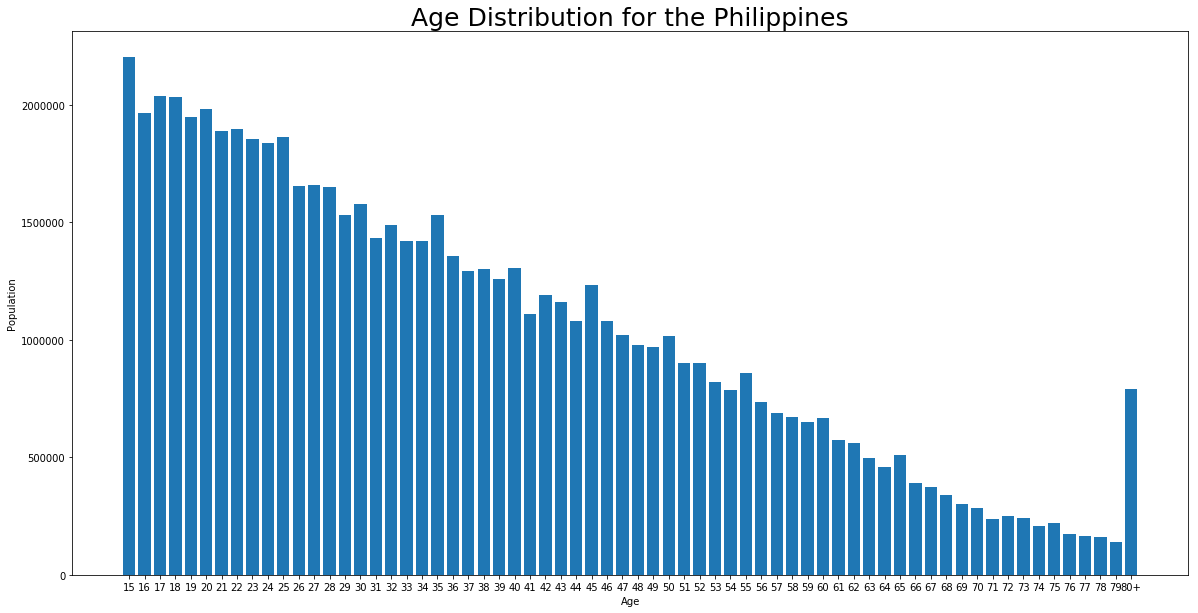

In [102]:
region = '_PHILIPPINES_Statistical Tables.xls'

df = pd.read_excel('/mnt/data/public/census/' + region,
                   sheet_name='T2').dropna(how='all')
df = df.iloc[18:84, :2]
df = df.rename(columns={'TABLE 2  Total Population by Single-Year Age and '
                        'Sex: 2015': 'Age',
                        'Unnamed: 1': 'Both'})
df['Age'][86] = '80+'

fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(df['Age'].astype('str'), df['Both'])
ax.set_xlabel('Age')
ax.set_ylabel('Population')
plt.title('Age Distribution for the Philippines', fontsize=25);

From the age distribution, the highest population are those that are relatively young.

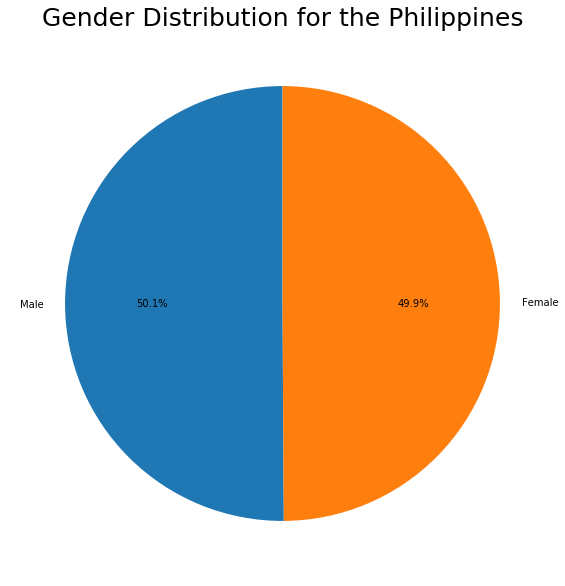

In [103]:
df = pd.read_excel('/mnt/data/public/census/' + region,
                   sheet_name='T2').dropna(how='all')
df = df.iloc[18:84, 3:5]
df = df.rename(columns={'Unnamed: 3': 'Male', 'Unnamed: 4': 'Female'})
df = np.sum(df, axis=0)

fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(df, startangle=90, autopct=(lambda x: str(
    round(x, 2)) + '%'), labels=['Male', 'Female'])
plt.title('Gender Distribution for the Philippines', fontsize=25);

There is not much difference in the gender distribution throughout the Philippines.

After all the preliminaries, we get a dataframe containing the Candidate Name, Party, and Vote Count grouped by Region per Candidate ID. We then focus on getting the top twelve (12) senator for the Philippines by getting the sum grouped by Candidate Name.

#### Getting the top twelve (12) senators

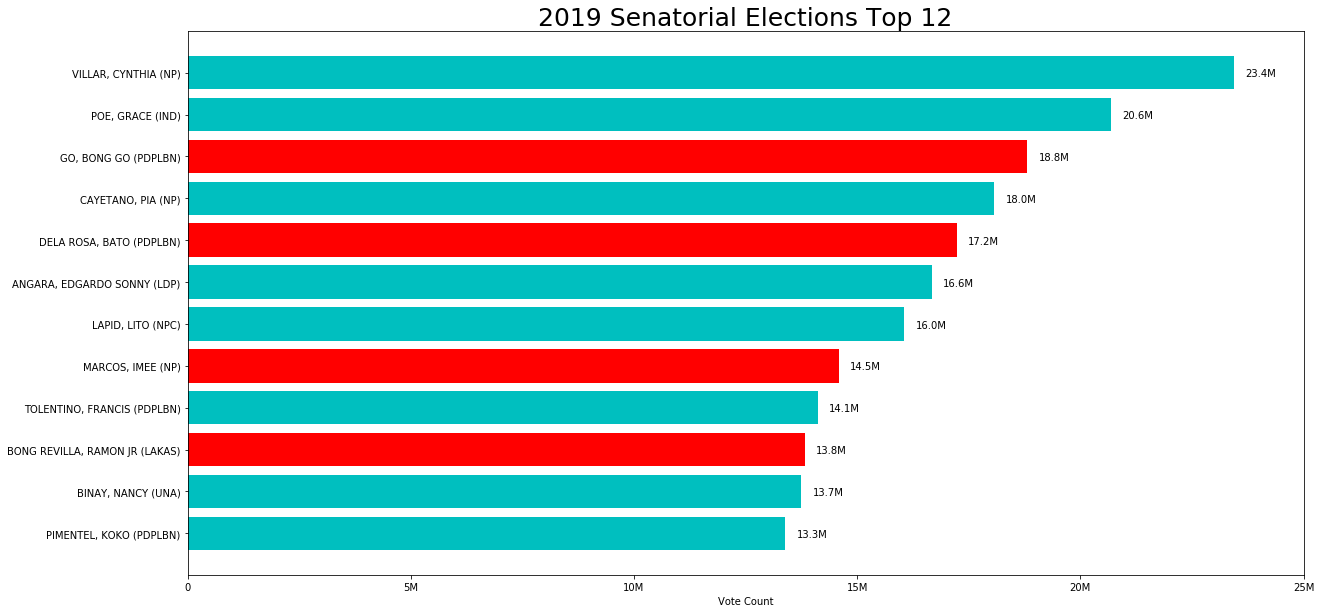

In [104]:
# Getting the dataframe of top 12 senators
df_top_12 = df_final.groupby('Candidate Name')['Vote Count'].sum().\
    sort_values(ascending=False)[:12]

# Plotting the top 12 senators
fig, ax = plt.subplots(figsize=(20, 10))
ax.barh(df_top_12.index[::-1], df_top_12[::-1], color='ccrcrccrcrcc')
ax.set_xlim(0, 25000000)
ax.set_xticklabels(['0', '5M', '10M', '15M', '20M', '25M'])
ax.set_xlabel('Vote Count')
plt.title('2019 Senatorial Elections Top 12', fontsize='25')

rects = ax.patches
labels = [str(i)[:2] + '.' + str(i)[2] + 'M' for i in df_top_12]

for rect, label in zip(rects, labels[::-1]):
    width = rect.get_width()
    ax.text(width + 600000, rect.get_y() + rect.get_height() / 3, label,
            ha='center', va='bottom')

Now, we see the results of the 2019 Senatorial Elections. From the top 12, we are personally interested in looking at the following candidates:

1. Dela Rosa, Bato (PDPLBN)
2. Go, Bong Go (PDPLBN)
3. Marcos, Imee (NP)
4. Bong Revilla, Ramon Jr (LAKAS)


### <u>Understanding each candidate</u>

To understand each candidate's views, we sourced a dataset publicly available created by Ryan Yu at https://public.tableau.com/profile/ryan.yu1783?fbclid=IwAR0dt8WcTiR5Npj1dEG2lkGQ7QgcKeWxEi1dKhqGAXqeaF7Sj6eqYRZcWP8#!/vizhome/PHSenatorialCandidateQuiz/Dashboard

This dataset considers each candidate's stand on key issues.
This will give us an idea on which demographic might be in favor of the respective candidate.

#### Each candidate's stand on key issues

<img src='Candidates.jpg' width='1000' height='1000' align='center'>

In [105]:
# Defining a function to get the no. of votes per candidate per region sorted descendingly by vote count
def vote_per_candidate_per_region(name):
    df_vote_per_candidate_per_region = df_final[df_final['Candidate Name'] ==
                                                name].sort_values(
        by='Vote Count', ascending=False)

    return df_vote_per_candidate_per_region

#### 1. Dela Rosa, Bato (PDPLBN)

<img src='batodelarosa.jpg' width='400' height='400' align='center'>
<center><i>Source: Google</i></center>

- Being the choice of the President, <b>Bato</b> is in favor of the Martial Law Extension in Mindanao and Lowering the Age of Criminal Liability. Prior to running for the senate, he served as the Director-General for the Bureau of Corrections. Much like his voucher, President Duterte, he also hails from Davao. A Philippine Military Academy (PMA) graduate, he is one of Duterte's most trusted long-time allies.


- We expect <b>Bato</b> to win in Southern Regions, particularly in Mindanao due to his roots and backing from the President.

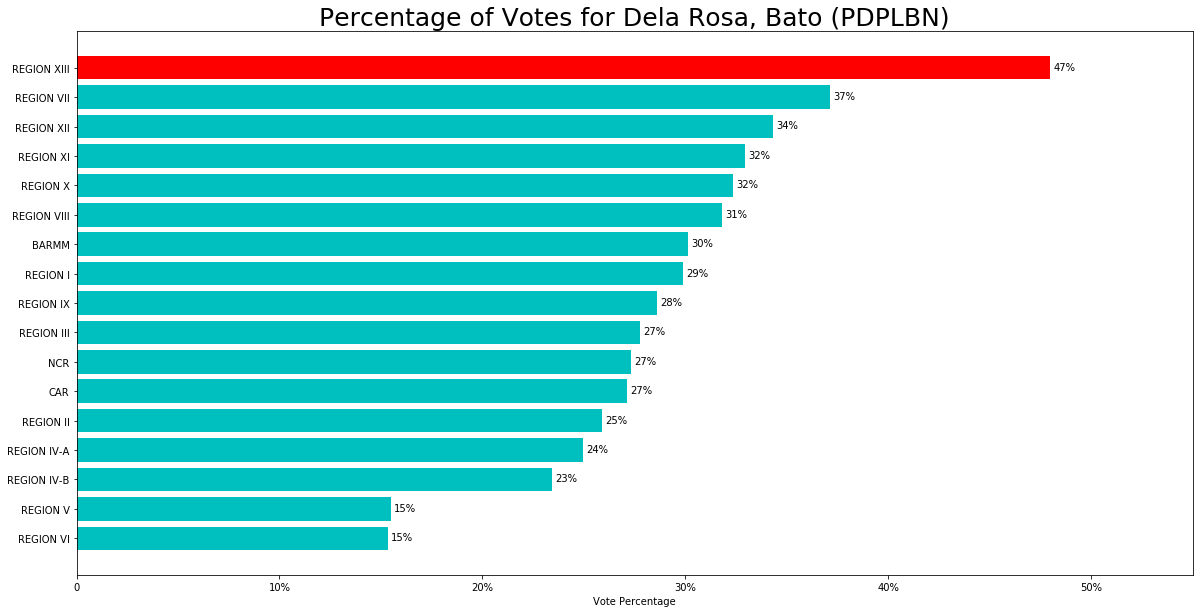

In [106]:
# Perentage of Votes for Bato De La Rosa
bdr_df = vote_per_candidate_per_region('DELA ROSA, BATO (PDPLBN)').\
                                        join(gender_df, how='left')
bdr_df['Vote Percentage'] = bdr_df['Vote Count'] / bdr_df['Both']
bdr_df = bdr_df.sort_values('Vote Percentage', ascending=False)

# Plot percentages
fig, ax = plt.subplots(figsize=(20, 10))
ax.barh(bdr_df['Vote Percentage'].index.get_level_values(0)[::-1],
        bdr_df['Vote Percentage'].values[::-1], color='ccccccccccccccccr')
ax.set_xlim(0, 0.55)
ax.set_xticklabels(['0', '10%', '20%', '30%', '40%', '50%'])
ax.set_xlabel('Vote Percentage')
plt.title('Percentage of Votes for Dela Rosa, Bato (PDPLBN)', fontsize='25')

rects = ax.patches
labels = [str(i)[2:4] + '%' for i in bdr_df['Vote Percentage'].values]

for rect, label in zip(rects, labels[::-1]):
    width = rect.get_width()
    ax.text(width + 0.007, rect.get_y() + rect.get_height() / 3, label,
            ha='center', va='bottom')

<b>NOTE: Percentage of Vote Counts were calculated as the ratio of Vote Counts in election data and Population Census with ages 18 years old and above.</b>

- True to our expectations, <b>Bato</b> lead the elections in <b>Region XIII - CARAGA</b> with a whopping <b>47%</b> of the voters including him in their votes. Most of his voters come from Regions VII, XII, XI, and X. <b>All except Region VII are Mindanao regions.</b>


- Later, let's take a look at the 2015 Population Census of Region XIII - CARAGA to further understand the profile of the voters.

<b>It would also be interesting to look at another one of President Duterte's closest allies, Bong Go.</b>

#### 2. Go, Bong Go (PDPLBN)

<img src='bonggo.jpg' width='200' height='200' align='center'>
<center><i>Source: Google</i></center>

- Another choice of the President, <b>Bong Go</b> was appointed as the Special Assistant to the President from 2016 to 2018. Like his allies, he also comes from Davao. He is in favor of the Bangsamoro Basic Law, Lowering the age of Criminal Liability, and Martial Law Extension in Mindanao to name a few.


- With his support on the platforms that focus on the Southern Regions, we expect him to win in these regions. In particular, his support for the Bangsamoro Basic Law might garner him a large percentage of votes for BARMM.

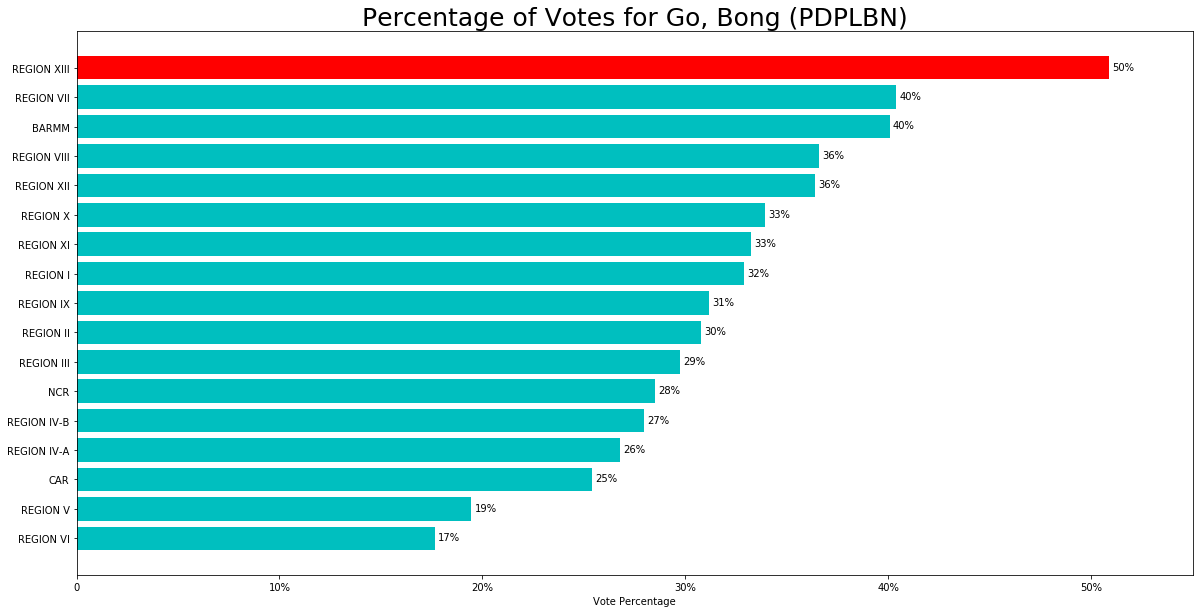

In [107]:
# Perentage of Votes for Bong Go
bg_df = vote_per_candidate_per_region('GO, BONG GO (PDPLBN)').join(gender_df,
                                                                   how='left')
bg_df['Vote Percentage'] = bg_df['Vote Count'] / bg_df['Both']
bg_df = bg_df.sort_values('Vote Percentage', ascending=False)

# Plot percentages
fig, ax = plt.subplots(figsize=(20, 10))
ax.barh(bg_df['Vote Percentage'].index.get_level_values(0)[::-1],
        bg_df['Vote Percentage'].values[::-1], color='ccccccccccccccccr')
ax.set_xlim(0, 0.55)
ax.set_xticklabels(['0', '10%', '20%', '30%', '40%', '50%'])
ax.set_xlabel('Vote Percentage')
plt.title('Percentage of Votes for Go, Bong (PDPLBN)', fontsize='25')

rects = ax.patches
labels = [str(i)[2:4] + '%' for i in bg_df['Vote Percentage'].values]

for rect, label in zip(rects, labels[::-1]):
    width = rect.get_width()
    ax.text(width + 0.007, rect.get_y() + rect.get_height() / 3, label,
            ha='center', va='bottom')

Similar with Bato, Region XIII - CARAGA is again at the top of the chart. However, somewhat true to our expectations, a large percentage <b>(40%)</b> of voters in BARMM voted for him. This might be attributed to his support for the Bangsamoro Basic Law.

<b>Let's take a look at the Population Profile for Region XIII since this is where both Bato De La Rosa and Bong Go dominated in. Hopefully, we can have a glimpse of the demographic that these candidates appeal to.</b>

### Population Profile for Region XIII

#### Gender

In [108]:
r13male_df = bg_df['Male']/bg_df['Both']
r13female_df = bg_df['Female']/bg_df['Both']

r13_df = pd.DataFrame([round(r13male_df.iloc[0]*100, 2), round(
    r13female_df.iloc[0]*100, 2)], ['Male', 'Female'], columns=['Region XIII'])
r13_df

,Region XIII
Male,51.22
Female,48.78


The Male-Female ratio at Region XIII is close to one (1) so that means the voters' gender might not have played a big role in Bong Go and Bato's regional win.

#### Age Groups

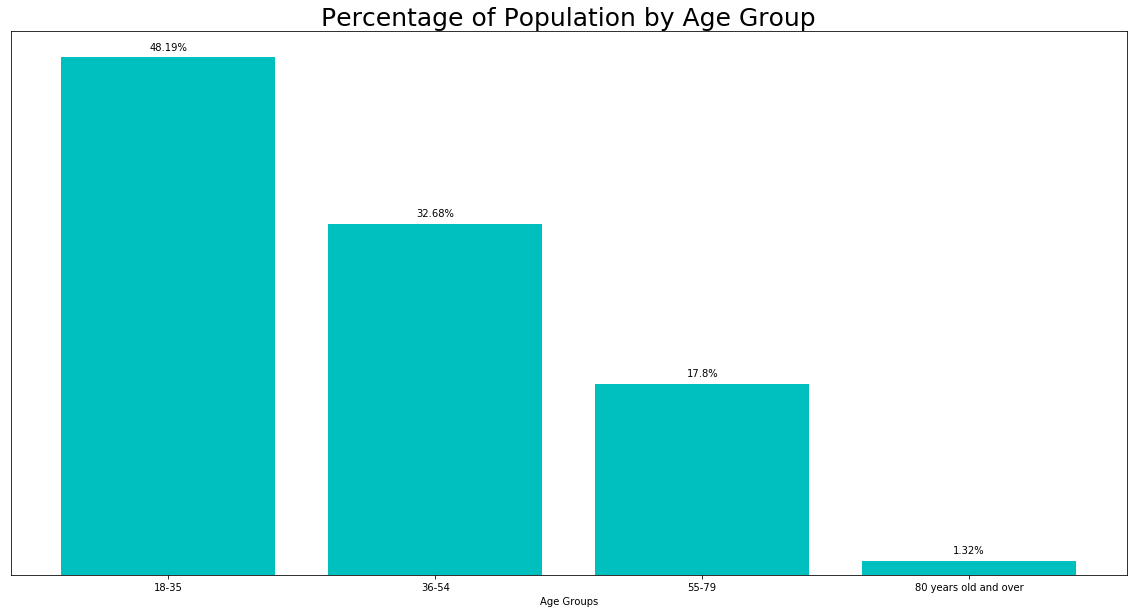

In [109]:
age_list = []
age_group_df = pd.DataFrame()
df = pd.read_excel('/mnt/data/public/census/_CARAGA_Statistical Tables.xls',
                   sheet_name='T2', usecols=[0, 1, 2, 3],
                   names=['Age', 'Both', 'Male', 'Female'])
df.dropna(how='all', inplace=True)
age_list.append(('18-35', df.iloc[21:39, 1].sum(),
                 df.iloc[21:39, 2].sum(), df.iloc[21:39, 3].sum()))
age_list.append(('36-54', df.iloc[39:58, 1].sum(),
                 df.iloc[39:58, 2].sum(), df.iloc[39:58, 3].sum()))
age_list.append(('55-79', df.iloc[58:83, 1].sum(),
                 df.iloc[58:83, 2].sum(), df.iloc[58:83, 3].sum()))
age_list.append(('80 years old and over', df.iloc[83:84, 1].sum(
), df.iloc[83:84, 2].sum(), df.iloc[83:84, 3].sum()))

age_group_df = age_group_df.append(age_list)
age_group_df.rename(
    columns={0: 'Age Group', 1: 'Both', 2: 'Male', 3: 'Female'}, inplace=True)

age_group_df['Both'] = [round(i, 2) for i in (
    age_group_df['Both']/bg_df['Both'].iloc[0])*100]
age_group_df['Male'] = [round(i, 2) for i in (
    age_group_df['Male']/bg_df['Both'].iloc[0])*100]
age_group_df['Female'] = [round(i, 2) for i in (
    age_group_df['Female']/bg_df['Both'].iloc[0])*100]
age_group_df

fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(age_group_df['Age Group'],
       age_group_df['Both'], color='ccccccccccccccccr')
ax.set_xlabel('Age Groups')
ax.set_yticks([])
plt.title('Percentage of Population by Age Group', fontsize='25')

rects = ax.patches
labels = [str(i) + '%' for i in age_group_df['Both'].values]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0.5, label,
            ha='center', va='bottom')

<b>48.19%</b> of the population for Region XIII are from the Age Groups 18-35. The candidates may have appealed to this particular age group which contributed to their regional win.

#### Occupation

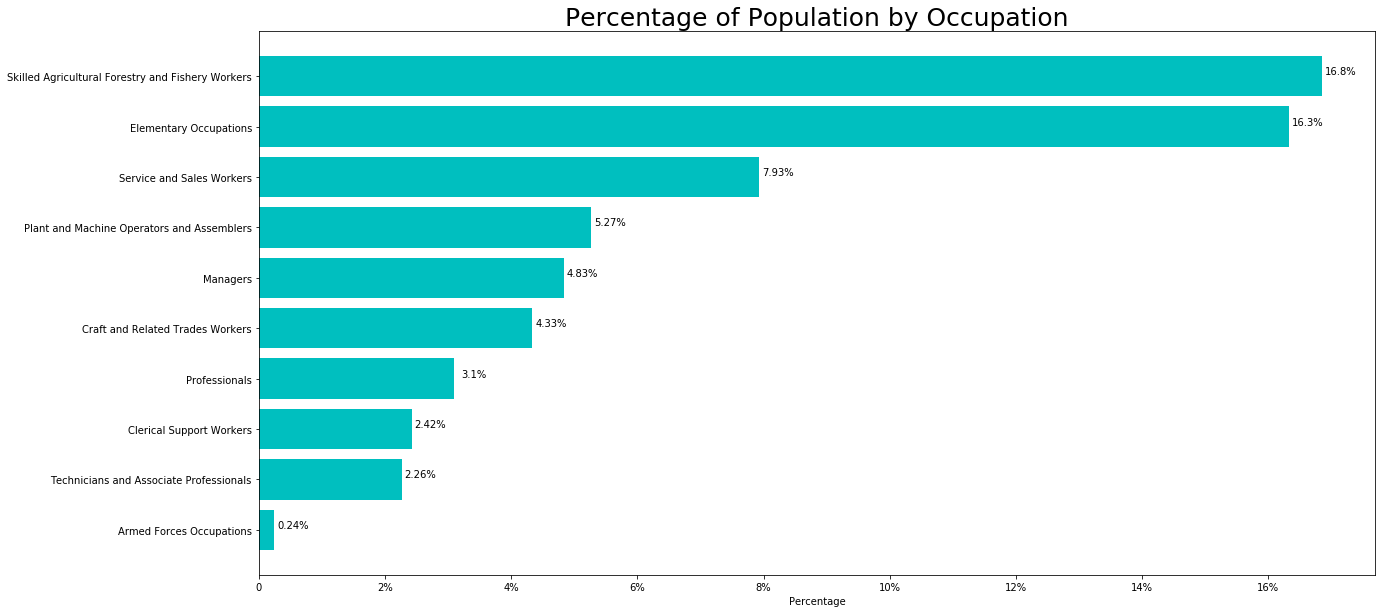

In [110]:
region = '_CARAGA_Statistical Tables.xls'

occ_df = pd.read_excel('/mnt/data/public/census/' + region,
                       sheet_name='T13', header=None)

occ_df = occ_df.dropna(how='all').iloc[5:15, :2].rename(
    columns={0: 'Occupation', 1: 'Count'})

occ_df['Occupation Percentage'] = [round(i, 2)
                                   for i in (occ_df['Count']/bg_df['Both'].
                                             iloc[0])*100]

occ_df = occ_df.sort_values('Occupation Percentage', ascending=False)

fig, ax = plt.subplots(figsize=(20, 10))
ax.barh(occ_df['Occupation'][::-1], occ_df['Occupation Percentage'][::-1],
        color='c')
ax.set_xticklabels(['0', '2%', '4%', '6%', '8%', '10%', '12%', '14%', '16%'])
ax.set_xlabel('Percentage')
plt.title('Percentage of Population by Occupation', fontsize='25')

rects = ax.patches
labels = [str(round(i, 2))[:4] + '%'
          for i in occ_df['Occupation Percentage'].values]

for rect, label in zip(rects, labels[::-1]):
    width = rect.get_width()
    ax.text(width + 0.3, rect.get_y() + rect.get_height() / 2, label,
            ha='center', va='bottom')

Most of the population aged 18 and above in Region XIII are skilled agricultural forestry and fishery workers, followed by elementary occupations. These candidates may also have captured these occupation groups.

#### 3. Marcos, Imee (NP)

<img src='imeemarcos.jpg' width='300' height='300' align='center'>
<center><i>Source: Google</i></center>

<b>Imee Marcos</b> is one of the President's choice in the senatorial elections who took the 8th spot. She is known to be from Ilocos Norte where she ran as Congresswoman of the 2nd district in 1998 and as governor in the 2010 elections. Imee is in favor of some key issues being faced by the country like Death Penalty, Federalism, Martial Law extension in Mindanao and some other issues that has something to do with governance. During her senatorial candidacy, Imee used a slogan <b>"Tama na ang puro opinyon. Maghain ng solusyon!"</b>



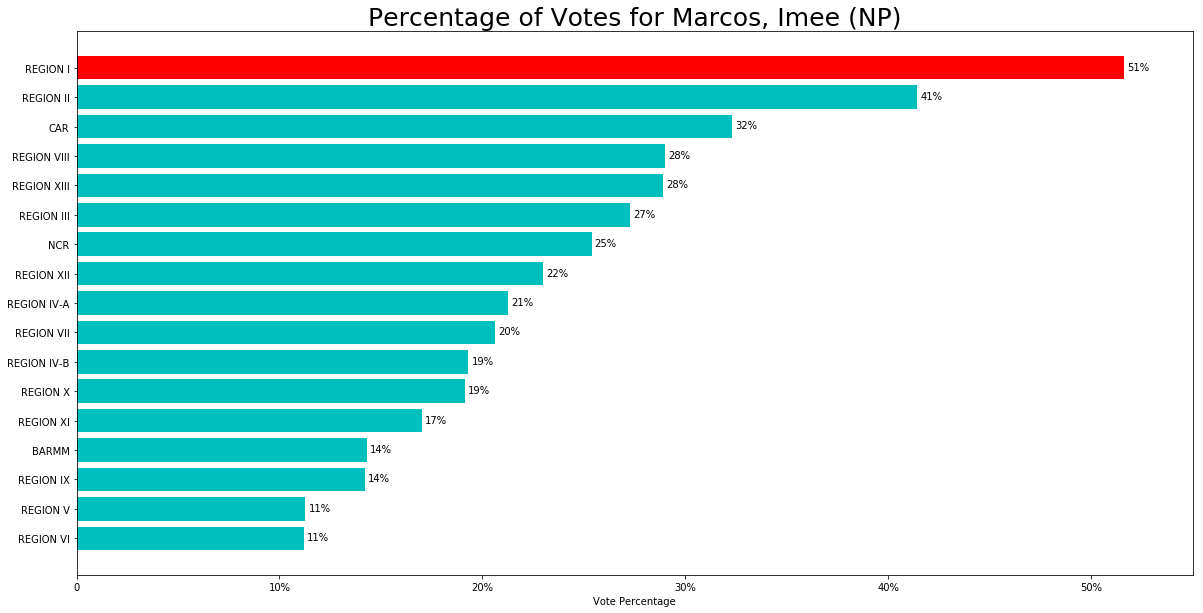

In [111]:
# Percentage of Votes for Imee Marcos
im_df = vote_per_candidate_per_region('MARCOS, IMEE (NP)').join(gender_df,
                                                                how='left')
im_df['Vote Percentage'] = im_df['Vote Count'] / im_df['Both']
im_df = im_df.sort_values('Vote Percentage', ascending=False)

# Plot percentages
fig, ax = plt.subplots(figsize=(20, 10))
ax.barh(im_df['Vote Percentage'].index.get_level_values(0)[::-1],
        im_df['Vote Percentage'].values[::-1], color='ccccccccccccccccr')
ax.set_xlim(0, 0.55)
ax.set_xticklabels(['0', '10%', '20%', '30%', '40%', '50%'])
ax.set_xlabel('Vote Percentage')
plt.title('Percentage of Votes for Marcos, Imee (NP)', fontsize='25')

rects = ax.patches
labels = [str(i)[2:4] + '%' for i in im_df['Vote Percentage'].values]

for rect, label in zip(rects, labels[::-1]):
    width = rect.get_width()
    ax.text(width + 0.007, rect.get_y() + rect.get_height() / 3, label,
            ha='center', va='bottom')

#### Homecourt Advantage

Imee is more popular in the northern regions in the Philippines particularly its hometown, <b>Region I</b> where she gained approximately 50% of the voter's preference. Let us now see its population profile to know what charactersitics of people majority voted for Imee.

### Population Profile for Region I

#### Gender

In [112]:
r1male_df = im_df['Male']/im_df['Both']
r1female_df = im_df['Female']/im_df['Both']

r1_df = pd.DataFrame([round(r1male_df.iloc[0]*100, 2),
                      round(r1female_df.iloc[0]*100, 2)],
                     ['Male', 'Female'], columns=['Region I'])
r1_df

,Region I
Male,49.66
Female,50.34


For the gender distribution in Ilocos Region, we can say that there is no significant difference in the population of male and female voters. With this, we can say that the gender of the voter is not one of the factors why they would choose Imee as senator for the said region. 

#### Age Group

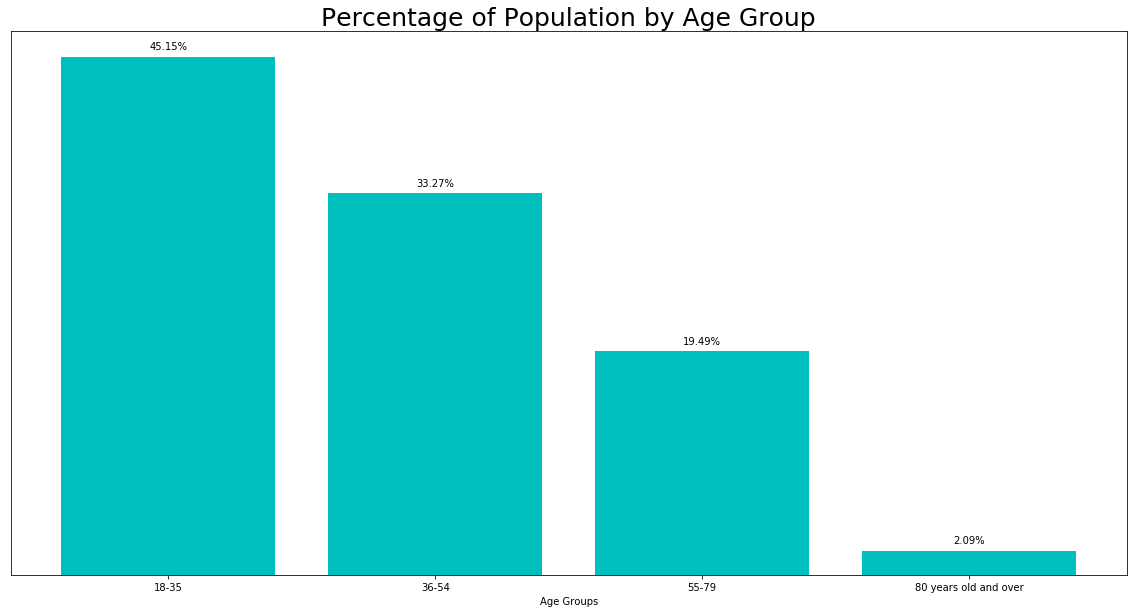

In [113]:
region1 = '_REGION I_Statistical Tables.xls'
age_list1 = []
age_group_df1 = pd.DataFrame()
df1 = pd.read_excel('/mnt/data/public/census/' + region1,
                    sheet_name='T2', usecols=[0, 1, 2, 3],
                    names=['Age', 'Both', 'Male', 'Female'])
df1.dropna(how='all', inplace=True)
age_list1.append(('18-35', df1.iloc[21:39, 1].sum(),
                  df1.iloc[21:39, 2].sum(), df1.iloc[21:39, 3].sum()))
age_list1.append(('36-54', df1.iloc[39:58, 1].sum(),
                  df1.iloc[39:58, 2].sum(), df1.iloc[39:58, 3].sum()))
age_list1.append(('55-79', df1.iloc[58:83, 1].sum(),
                  df1.iloc[58:83, 2].sum(), df1.iloc[58:83, 3].sum()))
age_list1.append(('80 years old and over', df1.iloc[83:84, 1].sum(
), df1.iloc[83:84, 2].sum(), df1.iloc[83:84, 3].sum()))

age_group_df1 = age_group_df1.append(age_list1)
age_group_df1.rename(
    columns={0: 'Age Group', 1: 'Both', 2: 'Male', 3: 'Female'}, inplace=True)

age_group_df1['Both'] = [round(i, 2) for i in (
    age_group_df1['Both']/im_df['Both'].iloc[0])*100]
age_group_df1['Male'] = [round(i, 2) for i in (
    age_group_df1['Male']/im_df['Both'].iloc[0])*100]
age_group_df1['Female'] = [round(i, 2) for i in (
    age_group_df1['Female']/im_df['Both'].iloc[0])*100]
age_group_df1

fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(age_group_df1['Age Group'],
       age_group_df1['Both'], color='ccccccccccccccccr')
ax.set_xlabel('Age Groups')
ax.set_yticks([])
plt.title('Percentage of Population by Age Group', fontsize='25')

rects = ax.patches
rects
labels = [str(i) + '%' for i in age_group_df1['Both'].values]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0.5, label,
            ha='center', va='bottom')

Majority of the population of voters in Region I aged between <b>18-35 years old (45.15%)</b> and <b>36-54 years old (33.27%)</b> of the voting population. While it was not directly implied, we can infer that Imee is popular for millenials to mid-aged voter in Region I as 50% of them voted for her as their senator. This might be attributed to her being a previous congresswoman and governor of the said region assuming that all people aged 18 years old and above voted in the election. 

#### Occupation

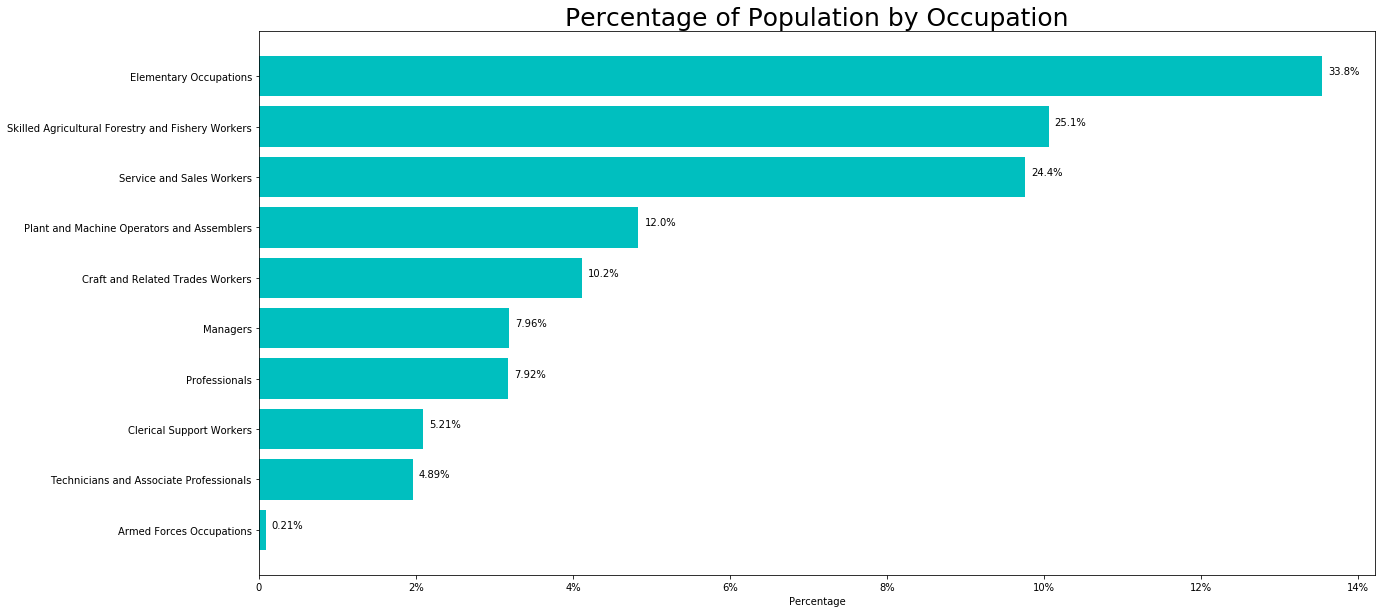

In [114]:
occ_df1 = pd.read_excel('/mnt/data/public/census/' + region1,
                        sheet_name='T13', header=None)

occ_df1 = occ_df1.dropna(how='all').iloc[5:15, :2].rename(
    columns={0: 'Occupation', 1: 'Count'})

occ_df1['Occupation Percentage'] = [round(i, 2)
                                    for i in (occ_df1['Count']/bg_df['Both'].
                                              iloc[0])*100]

occ_df1 = occ_df1.sort_values('Occupation Percentage', ascending=False)

fig, ax = plt.subplots(figsize=(20, 10))
ax.barh(occ_df1['Occupation'][::-1], occ_df1['Occupation Percentage'][::-1],
        color='c')
ax.set_xticklabels(['0', '2%', '4%', '6%', '8%', '10%', '12%', '14%', '16%'])
ax.set_xlabel('Percentage')
plt.title('Percentage of Population by Occupation', fontsize='25')

rects = ax.patches
labels = [str(round(i, 2))[:4] + '%'
          for i in occ_df1['Occupation Percentage'].values]

for rect, label in zip(rects, labels[::-1]):
    width = rect.get_width()
    ax.text(width + 0.7, rect.get_y() + rect.get_height() / 2, label,
            ha='center', va='bottom')

Looking at the figure above, we can see that majority of voters in Region I are under the <b>elementary occupations category (33.8%).</b> 

Elementary occupations, as defined by International Standard Classification of Occupations (ISCO) consist of simple and routine tasks which mainly require the use of hand-held tools and often some physical effort. Examples of this are street vendors, construction site workers, cleaners, domestic helpers, farm hands and other occupation that does not require skilled labor.

With this, we can infer that most people who voted for Imee were under this category which might have been affected by her campaign slogan "Tama na ang puro opinyon. Maghain ng solusyon!". People tend to look for a change and solution to the existing problems they have especially in generating occupations that would really help them most. 

#### 4. Bong Revilla, Ramon Jr. (LAKAS)

<img src='bongrevilla.jpg' width='200' height='200' align='center'>
<center><i>Source: Google</i></center>

<b>Bong Revilla</b> is known to be a Filipino actor and politician who is a native of Bacoor, Cavite. He started as vice-governor of Cavite in 1995 and ran as governor in 1998. Additionally, his senatorial candidacy started in 2004 followed by his second term in 2010 in which he topped the senatorial race. He ran again for senatorial position in the recently conducted 2019 Elections and won the 10th spot.

With all his experiences as a politician, particularly in Cavite, we assume that his home region would bring him up if they were satisfied with what he has done during his term in his previous positions.

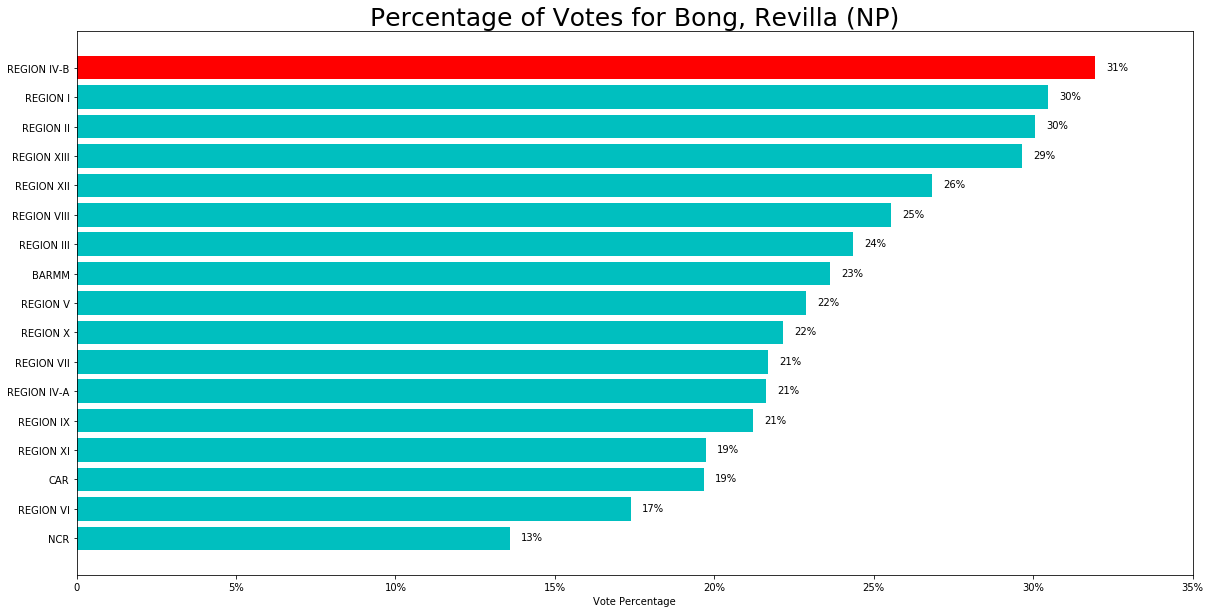

In [116]:
# Percentage of Votes for Bong Revilla
br_df = vote_per_candidate_per_region('BONG REVILLA, RAMON JR (LAKAS)').\
                                        join(gender_df, how='left')
br_df['Vote Percentage'] = br_df['Vote Count'] / br_df['Both']
br_df = br_df.sort_values('Vote Percentage', ascending=False)
# Get the percentage of voters per region (Vote Count / Population of Census Data - 18 years above)

# Plot percentages
fig, ax = plt.subplots(figsize=(20, 10))
ax.barh(br_df['Vote Percentage'].index.get_level_values(0)[::-1],
        br_df['Vote Percentage'].values[::-1], color='ccccccccccccccccr')
ax.set_xlim(0, 0.35)
ax.set_xticklabels(['0', '5%', '10%', '15%', '20%', '25%', '30%', '35%'])
ax.set_xlabel('Vote Percentage')
plt.title('Percentage of Votes for Bong, Revilla (NP)', fontsize='25')

rects = ax.patches
labels = [str(i)[2:4] + '%' for i in br_df['Vote Percentage'].values]

for rect, label in zip(rects, labels[::-1]):
    width = rect.get_width()
    ax.text(width + 0.007, rect.get_y() + rect.get_height() / 3, label,
            ha='center', va='bottom')

#### Homecourt Advantage

Bong Revilla is more popular in <b>Region IV-B</b> whereas Region IV-A ranked 12 in regions who preferred him the most. This is different from our assumption that he would be brought up by his home region, just like in NCR in which he only got 13% of vote.

### Population Profile for Region IV-B MIMAROPA

#### Gender

In [120]:
r4bmale_df = br_df['Male']/br_df['Both']
r4bfemale_df = br_df['Female']/br_df['Both']

r4b_df = pd.DataFrame([round(r4bmale_df.iloc[0]*100, 2),
                       round(r4bfemale_df.iloc[0]*100, 2)],
                      ['Male', 'Female'], columns=['Region IV-B'])
r4b_df

,Region IV-B
Male,50.99
Female,49.01


For the gender distribution in MIMAROPA, we can say that there is no significant difference in the population of male and female voters. With this, we can say that the gender of the voter is not one of the factors why they would choose Bong Revilla as senator for the said region. 

#### Age Group

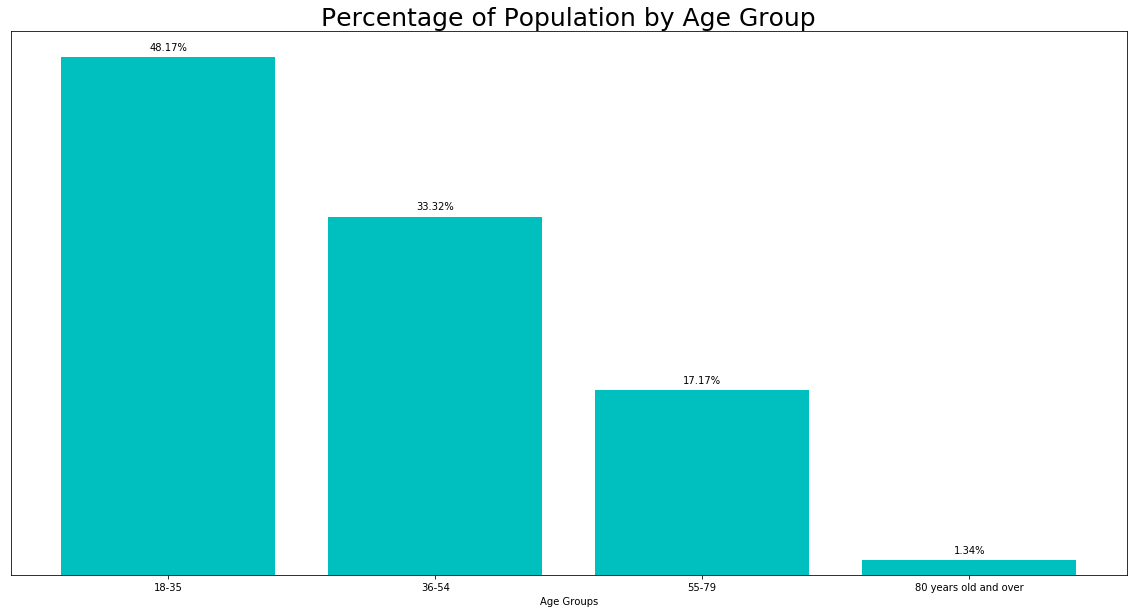

In [121]:
region4b = '_MIMAROPA_Statistical Tables.xls'
age_list4b = []
age_group_df4b = pd.DataFrame()
df4b = pd.read_excel('/mnt/data/public/census/' + region4b,
                     sheet_name='T2', usecols=[0, 1, 2, 3],
                     names=['Age', 'Both', 'Male', 'Female'])
df4b.dropna(how='all', inplace=True)
age_list4b.append(('18-35', df4b.iloc[21:39, 1].sum(),
                   df4b.iloc[21:39, 2].sum(), df4b.iloc[21:39, 3].sum()))
age_list4b.append(('36-54', df4b.iloc[39:58, 1].sum(),
                   df4b.iloc[39:58, 2].sum(), df4b.iloc[39:58, 3].sum()))
age_list4b.append(('55-79', df4b.iloc[58:83, 1].sum(),
                   df4b.iloc[58:83, 2].sum(), df4b.iloc[58:83, 3].sum()))
age_list4b.append(('80 years old and over', df4b.iloc[83:84, 1].sum(
), df4b.iloc[83:84, 2].sum(), df4b.iloc[83:84, 3].sum()))

age_group_df4b = age_group_df4b.append(age_list4b)
age_group_df4b.rename(
    columns={0: 'Age Group', 1: 'Both', 2: 'Male', 3: 'Female'}, inplace=True)

age_group_df4b['Both'] = [round(i, 2) for i in (
    age_group_df4b['Both']/br_df['Both'].iloc[0])*100]
age_group_df4b['Male'] = [round(i, 2) for i in (
    age_group_df4b['Male']/br_df['Both'].iloc[0])*100]
age_group_df4b['Female'] = [round(i, 2) for i in (
    age_group_df4b['Female']/br_df['Both'].iloc[0])*100]
age_group_df4b

fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(age_group_df4b['Age Group'],
       age_group_df4b['Both'], color='ccccccccccccccccr')
ax.set_xlabel('Age Groups')
ax.set_yticks([])
plt.title('Percentage of Population by Age Group', fontsize='25')

rects = ax.patches
rects
labels = [str(i) + '%' for i in age_group_df4b['Both'].values]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0.5, label,
            ha='center', va='bottom')

Almost half of the population of voters in MIMAROPA aged between <b>18-35 years old (48.17%)</b>. We can infer from this that Bong Revilla is appealing to mid-aged voters assuming that all people aged 18 years old and above voted in the election. 

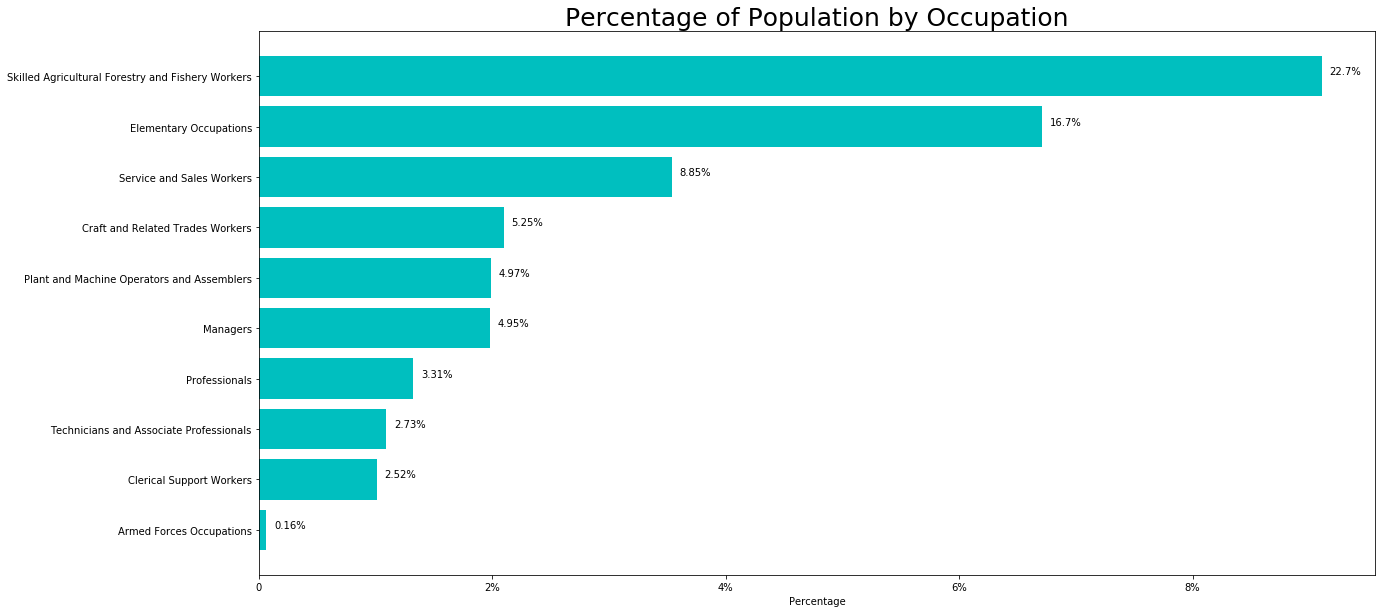

In [122]:
occ_df1 = pd.read_excel('/mnt/data/public/census/' + region4b,
                        sheet_name='T13', header=None)

occ_df1 = occ_df1.dropna(how='all').iloc[5:15, :2].rename(
    columns={0: 'Occupation', 1: 'Count'})

occ_df1['Occupation Percentage'] = [round(i, 2)
                                    for i in (occ_df1['Count']/bg_df['Both'].
                                              iloc[0])*100]

occ_df1 = occ_df1.sort_values('Occupation Percentage', ascending=False)

fig, ax = plt.subplots(figsize=(20, 10))
ax.barh(occ_df1['Occupation'][::-1], occ_df1['Occupation Percentage'][::-1],
        color='c')
ax.set_xticklabels(['0', '2%', '4%', '6%', '8%', '10%', '12%', '14%', '16%'])
ax.set_xlabel('Percentage')
plt.title('Percentage of Population by Occupation', fontsize='25')

rects = ax.patches
labels = [str(round(i, 2))[:4] + '%'
          for i in occ_df1['Occupation Percentage'].values]

for rect, label in zip(rects, labels[::-1]):
    width = rect.get_width()
    ax.text(width + 0.5, rect.get_y() + rect.get_height() / 2, label,
            ha='center', va='bottom')

The top three occupations of the population of voters in MIMAROPA consists of those under agricultural sector, elementary occupations and service and sales workers which. This probably means that Bong Revilla is highly popular in average wage-earner voters.


### <u>Conclusion</u>

<b> Homecourt Advantage </b>

Homecourt advantage plays a significant role in winning any position in the election, not only in senatorial position. This is because people from other regions/locations might think that he/she is really a great leader if they see that the support of his/her fellowmen are in him/her. It also implies that the candidate had done something for their town and they would want him/her to apply that positive change in a broader perspective. Same is true if the fellow did not want what was already done to their town. They would probably would not support him/her because they already have the experience of what it is like to be under his/her governance.

As for the aspiring candidates in any position in the next election, we would advice you to take the heart of your fellow as this may be the reason for the success or failure in your candidacy.

<b> Gender </b>

The gender distribution of the voters did not matter as to whether they would vote for the candidate like his/her own gender. This is probably because people are looking at their advocacies and plans that would want to implement regardless of whether he/she is of their same gender or not.

<b> Age </b>

Age plays a significant role in winning any position in the election because the voter's population is divided by specific age groups. It is important for the candidates to win the heart of those which comprise the larger population which are those who aged 18 - 35 years old. In their campaign, they would want to give more advocacies that might have a positive impact to them but not sacrifing those who are not part of this age group.

<b> Occupation </b>

The occupation of voters really matter when they select the candidates they prefer. This is because people would tend to look at what he/she could get if they vote that candidate, so they would look at his/her advocacies. With this, the candidate might want to capture their needs and include it in his plans which would surely be of great impact to those voters who would benefit if the candidate won the position.


<b> Limitations </b>

These are just some of the factors that we consider in determining whether a candidate would win in the election or not. However, we would not assure you that considering all of this would be a sure win because there are other external factors which might affect the election result and we only focused on the demographic characteristics of the voter from the given datasets.
